<a href="https://colab.research.google.com/github/shoukath-ali/MNIST-Hand-written-digit-recognition/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install ipympl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 510 kB 5.2 MB/s 
     |████████████████████████████████| 11.2 MB 48.9 MB/s 
     |████████████████████████████████| 1.6 MB 49.1 MB/s 
     |████████████████████████████████| 960 kB 37.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [45]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
get_ipython().run_line_magic('matplotlib', 'widget')
import matplotlib.pyplot as plt
# plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

#from public_tests import * 

#from autils import *
#from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

from keras.datasets import mnist


In [46]:
def my_softmax(z):  
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """    
    ### START CODE HERE ### 
    exp = np.exp(z)
    su = np.sum(exp)
    a = exp/su

    ### END CODE HERE ### 
    return a

In [47]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]


In [48]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [49]:
print ('The shape of X train is: ' + str(x_train.shape))
print ('The shape of y train is: ' + str(y_train.shape))

The shape of X train is: (60000, 28, 28)
The shape of y train is: (60000,)


In [50]:
print ('The shape of X test is: ' + str(x_test.shape))
print ('The shape of y test is: ' + str(y_test.shape))


The shape of X test is: (10000, 28, 28)
The shape of y test is: (10000,)


In [51]:
y_train[0]

5

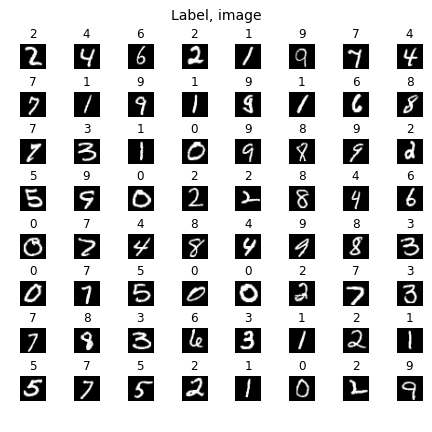

In [52]:
a,m, n =x_train.shape

fig, axes = plt.subplots(8,8, figsize=(6,6))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

# fig.tight_layout(pad=0.5)
# widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(a)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x_train[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y_train[random_index])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)



In [92]:
x_mod = []
for i in range(0,x_train.shape[0]):
  x_mod.append(x_train[i].reshape(784)) 

In [95]:
x_s = np.array(x_mod)

In [96]:
x_s.shape

(60000, 784)

In [97]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
    tf.keras.Input((784,)),
     Dense(units = 25 , activation = relu, name = 'L1'),
     Dense(units = 15 , activation = relu, name = 'L2' ),
     Dense(units = 10 , activation = linear, name = 'L3')
    ], name = "my_model" 
)

In [98]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                19625     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


In [99]:
[layer1, layer2, layer3] = model.layers

In [100]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [101]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    x_s,y_train,
    epochs=40
)

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 2.0549
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0241
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7973
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5945
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5237
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4903
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4726
Epoch 8/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4456
Epoch 9/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4191
Epoch 10/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3960
Epoch 11/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3761
Epoch 12/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3566
E

In [106]:
test = x_test[0]
prediction = model.predict(test.reshape(1,784))  # prediction

print(f" predicting with model: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")
print(f"Verification with data: {y_test[0]}")

 predicting with model: 
[[ 2.94  6.43 15.32 16.95  2.03 11.26 -4.48 24.77  5.82  3.2 ]]
 Largest Prediction index: 7
Verification with data: 7


In [107]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting. Probability vector: 
[[3.30e-10 1.08e-08 7.92e-05 4.02e-04 1.34e-10 1.36e-06 1.98e-13 1.00e+00
  5.88e-09 4.30e-10]]
Total of predictions: 1.000


In [108]:
print(f"np.argmax(prediction_p): {np.argmax(prediction_p)}")

np.argmax(prediction_p): 7


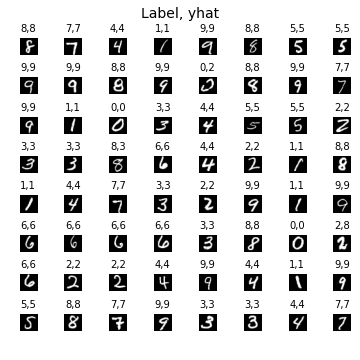

In [112]:
a,m, n = x_test.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(a)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x_test[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(x_test[random_index].reshape(1,784))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y_test[random_index]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()
